In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency
from google.colab import files

In [2]:
df = pd.read_excel('/content/house_data.xlsx')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
from exploracion import calidad_datos
calidad = calidad_datos(df)
display(calidad)

,tipo,nan,porcentaje_nan,ceros,porcentaje_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,IQR,lim_inf,lim_sup,atipicos
id,int64,0,0.0,0,0.000000,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,5185851251.0,-5655727682.5,15087677321.5,0
zipcode,int64,0,0.0,0,0.000000,21613.0,NaN,NaN,NaN,98077.939805,53.505026,98001.0,98033.0,98065.0,98118.0,98199.0,85.0,97905.5,98245.5,0
yr_renovated,int64,0,0.0,20699,95.771064,21613.0,NaN,NaN,NaN,84.402258,401.67924,0.0,0.0,0.0,0.0,2015.0,0.0,0.0,0.0,914
yr_built,int64,0,0.0,0,0.000000,21613.0,NaN,NaN,NaN,1971.005136,29.373411,1900.0,1951.0,1975.0,1997.0,2015.0,46.0,1882.0,2066.0,0
sqft_basement,int64,0,0.0,13126,60.731967,21613.0,NaN,NaN,NaN,291.509045,442.575043,0.0,0.0,0.0,560.0,4820.0,560.0,-840.0,1400.0,496
sqft_above,int64,0,0.0,0,0.000000,21613.0,NaN,NaN,NaN,1788.390691,828.090978,290.0,1190.0,1560.0,2210.0,9410.0,1020.0,-340.0,3740.0,611
grade,int64,0,0.0,0,0.000000,21613.0,NaN,NaN,NaN,7.656873,1.175459,1.0,7.0,7.0,8.0,13.0,1.0,5.5,9.5,1911
sqft_living15,int64,0,0.0,0,0.000000,21613.0,NaN,NaN,NaN,1986.552492,685.391304,399.0,1490.0,1840.0,2360.0,6210.0,870.0,185.0,3665.0,544
view,int64,0,0.0,19489,90.172581,21613.0,NaN,NaN,NaN,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2124
condition,int64,0,0.0,0,0.000000,21613.0,NaN,NaN,NaN,3.40943,0.650743,1.0,3.0,3.0,4.0,5.0,1.0,1.5,5.5,30


Muchos ceros sospechosos en columnas como:

yr_renovated: 95.7% son ceros que probablemente significa “nunca renovado”. aunque no importaria mucho eliminar estos ceros ya que no agregaria mucho valor estadistico a nuestro analisis, es decir mas que eliminar los ceros no tomariamos en cuenta este dato completo.

sqft_basement: 60.7% son ceros son casas sin sotano

view, waterfront: más del 90% son ceros → variables altamente desbalanceadas.

Valores atípicos extremos:

bedrooms tiene un máximo de 33 habitaciones, probablemente un error o se trata de un hotel por lo que quedaria igualmente excluida porque estamos analizando casas.

price tiene propiedades de hasta 7.7 millones, extremos fuera de rango común.

sqft_lot llega a más de 1.6 millones de pies cuadrados.

Otras columnas como sqft_living, sqft_living15, sqft_lot15, etc., también tienen valores fuera del rango típico.

Formato de fecha (date) como string (object) hay que transformarlo a datetime.

In [ ]:
#Limpieza basada en hallazgos
# Copia original para comparar
df_raw = df.copy()

# Limpiar fechas
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
# Eliminar filas con valores extremos en columnas sospechosas
# 1. Limpiar columnas con valores atípicos extremos
def no_atipicos(serie):
    """Devuelve una serie booleana para filtrar valores que no son outliers."""
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return (serie >= lim_inf) & (serie <= lim_sup)

limpiar_cols = ['bedrooms', 'price', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15']

for col in limpiar_cols:
    df = df[no_atipicos(df[col])]

In [ ]:
print(f"Filas después de limpieza: {df.shape[0]}")
calidad_final = calidad_datos(df)
display(calidad_final)

Filas después de limpieza: 16803


,tipo,nan,porcentaje_nan,ceros,porcentaje_ceros,count,mean,min,25%,50%,75%,max,std,IQR,lim_inf,lim_sup,atipicos
id,int64,0,0.0,0,0.000000,16803.0,4759528546.277212,2800031.0,2324539104.5,4073200757.0,7518501265.0,9900000190.0,2870200977.144247,5193962160.5,-5466404136.25,15309444505.75,0
zipcode,int64,0,0.0,0,0.000000,16803.0,98082.285544,98001.0,98033.0,98074.0,98119.0,98199.0,54.083735,86.0,97904.0,98248.0,0
yr_renovated,int64,0,0.0,16220,96.530381,16803.0,69.256442,0.0,0.0,0.0,0.0,2015.0,365.325022,0.0,0.0,0.0,583
yr_built,int64,0,0.0,0,0.000000,16803.0,1969.726477,1900.0,1950.0,1970.0,1997.0,2015.0,29.891371,47.0,1879.5,2067.5,0
sqft_basement,int64,0,0.0,10346,61.572338,16803.0,252.654347,0.0,0.0,0.0,500.0,1990.0,379.211862,500.0,-750.0,1250.0,283
sqft_above,int64,0,0.0,0,0.000000,16803.0,1591.639291,480.0,1140.0,1440.0,1920.0,3770.0,605.76007,780.0,-30.0,3090.0,390
grade,int64,0,0.0,0,0.000000,16803.0,7.411177,4.0,7.0,7.0,8.0,11.0,0.899092,1.0,5.5,9.5,458
sqft_living15,int64,0,0.0,0,0.000000,16803.0,1811.123073,620.0,1430.0,1720.0,2130.0,3260.0,509.429801,700.0,380.0,3180.0,93
view,int64,0,0.0,15736,93.649943,16803.0,0.136047,0.0,0.0,0.0,0.0,4.0,0.56095,0.0,0.0,0.0,1067
condition,int64,0,0.0,0,0.000000,16803.0,3.415521,1.0,3.0,3.0,4.0,5.0,0.651463,1.0,1.5,5.5,15


No hay nulos (porcentaje_nan = 0.0) en ninguna columna.

Las columnas limpias (bedrooms, price, sqft_living, sqft_lot, sqft_living15) ya no tienen atípicos, perfecto.

No hay ceros en variables donde no deberían estar (price, bedrooms, etc.).

1. bedrooms tiene máximo 5 y mínimo 2
No hay valores 0 ni absurdos como 33

2. price tiene un mínimo de 78.000 y máximo de 1.115.500
Todos dentro del rango razonable después de limpieza

3. yr_renovated
96% de los valores son 0, lo cual significa "nunca renovado" → normal.

Pero hay un valor promedio de 69.26, lo cual es raro, probablemente arrastrado por valores como 1, 2, 3 que no son años válidos.



In [ ]:
df[df['yr_renovated'] > 0]['yr_renovated'].value_counts().sort_index()

,count
yr_renovated,
1934,1
1940,2
1944,1
1945,3
1946,1
...,...
2011,12
2012,10
2013,27


Lo que estamos viendo son los valores no nulos (mayores a 0) en la columna yr_renovated, y todos corresponden a años válidos (desde 1934 hasta 2015),

In [ ]:
df['waterfront'].value_counts(dropna=False)

,count
waterfront,
0,16783
1,20


20 propiedades frente al agua (1)

16.783 que no lo están (0)

Ningún valor extraño ni nulo (aunque visualmente parecía que casi todos eran 0, lo cual es cierto pero válido).

In [ ]:
df['floors'].value_counts().sort_index()

,count
floors,
1.0,8789
1.5,1527
2.0,5843
2.5,84
3.0,554
3.5,6


In [ ]:
df['bathrooms'].value_counts().sort_index()

,count
bathrooms,
0.50,3
0.75,28
1.00,3397
1.25,6
1.50,1283
1.75,2563
2.00,1660
2.25,1640
2.50,4275


La columna bathrooms tiene algunos valores decimales, lo cual es esperado en este tipo de dataset (por ejemplo, viviendas con medio baño o medio piso adicional). Sin embargo, hay algunas observaciones que pueden parecer fuera de lugar, como el valor 0.50 que aparece solo 3 veces.

Dado que las viviendas no suelen tener medio baño de forma habitual, podemos considerar eliminar estos valores, pero antes revisemos si son un porcentaje significativo en relación al total.

In [ ]:
# Eliminar valores atípicos en la columna 'bathrooms' (por ejemplo, 0.50)
df = df[df['bathrooms'] != 0.50]

# 2. Analsis descriptivo

In [ ]:
# Resumen descriptivo
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.680000e+04,16800,1.680000e+04,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,...,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000
mean,4.759540e+09,2014-10-30 09:05:03.428571392,4.551521e+05,3.267381,1.991205,1844.381310,6947.026726,1.467530,0.001190,0.136071,...,7.411369,1591.716964,252.664345,1969.728095,69.268810,98082.278512,47.560178,-122.231916,1811.162560,6817.991786
min,2.800031e+06,2014-05-02 00:00:00,7.800000e+04,2.000000,0.750000,520.000000,520.000000,1.000000,0.000000,0.000000,...,4.000000,480.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.475000,620.000000,651.000000
25%,2.324039e+09,2014-07-23 00:00:00,3.050000e+05,3.000000,1.500000,1360.000000,4725.000000,1.000000,0.000000,0.000000,...,7.000000,1140.000000,0.000000,1950.000000,0.000000,98033.000000,47.472075,-122.338000,1430.000000,4800.000000
50%,4.073500e+09,2014-10-17 00:00:00,4.200000e+05,3.000000,2.000000,1770.000000,7000.000000,1.000000,0.000000,0.000000,...,7.000000,1440.000000,0.000000,1970.000000,0.000000,98074.000000,47.569800,-122.271000,1720.000000,7109.000000
75%,7.518501e+09,2015-02-18 00:00:00,5.700000e+05,4.000000,2.500000,2260.000000,8925.000000,2.000000,0.000000,0.000000,...,8.000000,1920.000000,500.000000,1997.000000,0.000000,98119.000000,47.680700,-122.156000,2130.000000,8650.000000
max,9.900000e+09,2015-05-24 00:00:00,1.115500e+06,5.000000,4.750000,3770.000000,18224.000000,3.500000,1.000000,4.000000,...,11.000000,3770.000000,1990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,3260.000000,14700.000000
std,2.870360e+09,NaN,1.940703e+05,0.781464,0.663912,637.455151,3228.258931,0.545236,0.034484,0.560997,...,0.898903,605.689915,379.226769,29.891922,365.356469,54.084900,0.138901,0.130542,509.461025,2830.411309


A continuación, hago algunos comentarios sobre las variables principales del conjunto de datos basándome en el resumen descriptivo:

price (Precio):

Promedio: $455,152

Mínimo: $78,000

Máximo: $1,115,500

El precio parece tener una distribución bastante dispersa, con algunos valores extremadamente altos (lo cual podría indicar outliers).

bedrooms (Habitaciones):

Promedio: 3.27

Mínimo: 2

Máximo: 5

El número de habitaciones parece estar en un rango bastante estándar, sin grandes variaciones.

bathrooms (Baños):

Promedio: 1.99

Mínimo: 0.75

Máximo: 4.75

Similar a las habitaciones, la cantidad de baños está en un rango razonable. El valor mínimo (0.75 baños) podría indicar casas con baños incompletos o en mal estado.

sqft_living (Superficie habitable):

Promedio: 1844.38 pies cuadrados

Mínimo: 520

Máximo: 3,770

Hay una diferencia considerable entre el mínimo y el máximo, lo que sugiere que algunas casas son significativamente más grandes que otras.

sqft_lot (Tamaño del lote):

Promedio: 6947 pies cuadrados

Mínimo: 520

Máximo: 18,224

Al igual que la superficie habitable, el tamaño del lote tiene una gran dispersión, lo que indica una variabilidad importante en el tipo de propiedades.

floors (Pisos):

Promedio: 1.47 pisos

Máximo: 3.5

La mayoría de las casas tienen entre 1 y 2 pisos, aunque algunas tienen hasta 3.5 pisos.

waterfront (Frente al agua):

Promedio: 0.0012 (aproximadamente 0%)

Solo una pequeña fracción de las casas están frente al agua, lo cual es consistente con la baja frecuencia de valores de 1 en la variable.

view (Vista):

Promedio: 0.136

Máximo: 4

Pocos hogares parecen tener vistas excepcionales, ya que el valor promedio es bajo.

grade (Calificación de la propiedad):

Promedio: 7.41

Mínimo: 4

Máximo: 11

Las propiedades tienen una calificación relativamente alta, lo que sugiere que la mayoría son viviendas de buena calidad.

zipcode (Código postal):

Hay códigos postales que abarcan diferentes áreas, lo cual puede explicar algunas variaciones en el precio debido a la ubicación.

# Analsis de correlacion

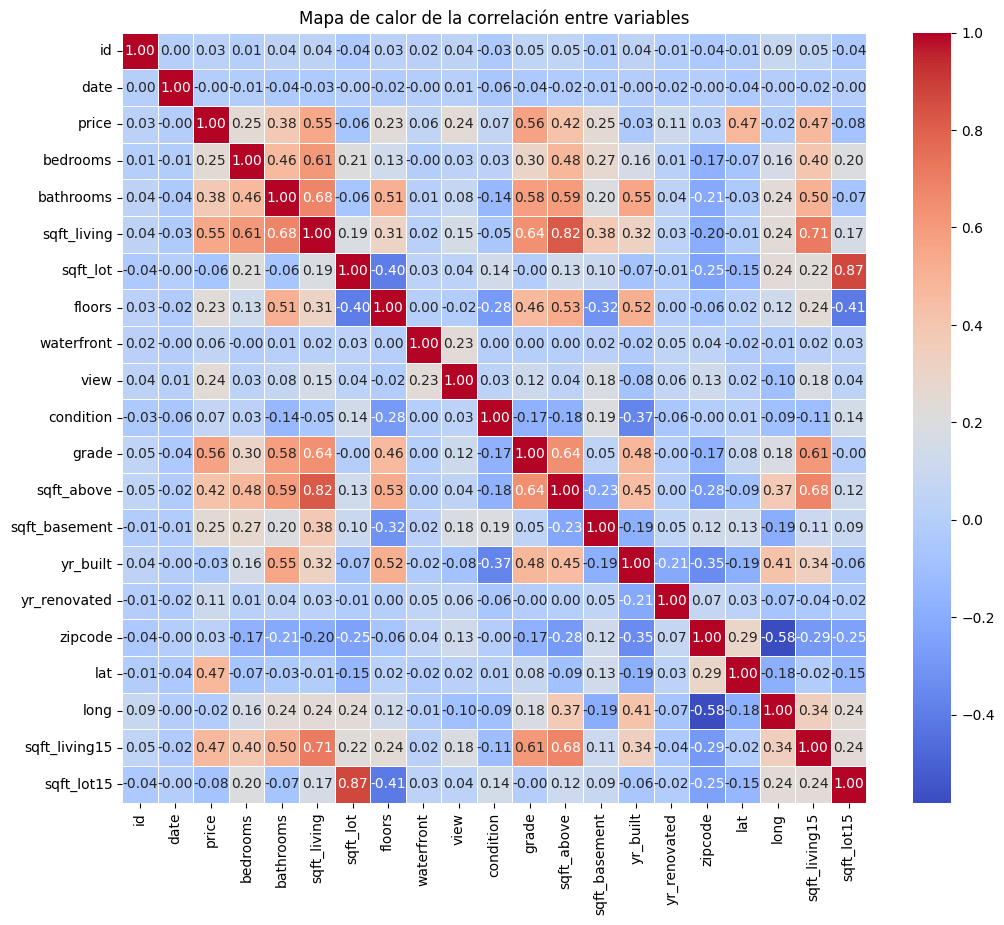

In [ ]:
# Calculando la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title("Mapa de calor de la correlación entre variables")
plt.show()

de acuerdo a esta matriz podemos observar correlaciones entre sqft_living y bathrooms, sqft_above y grade, sqft_lot15 y sqft_lot, pero en este analisis lo que nos importaria en mayor grado es la relacion que pudiera tener el precio con las demas variables, asi que vamos a enfocarnos en este.

In [ ]:
# Mostrar la correlación con el precio
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price

,price
price,1.000000
grade,0.563355
sqft_living,0.548119
lat,0.471961
sqft_living15,0.468296
sqft_above,0.419436
bathrooms,0.377667
sqft_basement,0.251439
bedrooms,0.247429
view,0.240626


Basado en los resultados de la correlación con el precio, podemos identificar algunas variables que tienen una relación más fuerte con el precio de las casas. Aquí están las variables con mayor correlación con el precio:

Grade (0.56): La calidad general de la casa tiene una correlación moderada positiva con el precio. Esto tiene sentido, ya que una mejor calidad de construcción tiende a aumentar el valor de la propiedad.

Sqft_living (0.55): El tamaño del área habitable es muy relevante para el precio, lo cual es lógico: cuanto más grande es la casa, mayor es el precio.

Lat (0.47): La latitud también muestra una correlación significativa con el precio. Esto podría reflejar el valor de la ubicación geográfica de las propiedades. En áreas más demandadas o deseables, el precio de las casas tiende a ser más alto.

Sqft_living15 (0.47): Similar a sqft_living, esta variable mide el tamaño del área habitable en los últimos 15 años, lo cual también está relacionado con el precio.

Sqft_above (0.42): El área habitable por encima del nivel del suelo tiene una correlación positiva, lo que indica que más espacio útil está asociado con precios más altos.

Bathrooms (0.38): La cantidad de baños en una casa también muestra una relación positiva con el precio. Más baños generalmente implican un precio más alto.

# 3. Divide los datos en conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir las variables dependientes e independientes
X = df.drop(columns=['price', 'id', 'date'])
y = df['price']

# Dividir los datos en conjunto de entrenamiento (67%) y prueba (33%), de manera estratificada en cuanto a la variable "price"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Inicializar el estandarizador (StandardScaler)
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el mismo scaler
X_test_scaled = scaler.transform(X_test)

# Mostrar las primeras filas de los datos estandarizados
X_train_scaled[:5], X_test_scaled[:5]

(array([[ 0.94019281,  0.77783921,  1.02071042, -0.67726671,  0.97911295,
         -0.03266858, -0.24303105, -0.64064698, -0.45285991,  1.48850615,
         -0.66760424,  1.04535133, -0.18868844, -0.49488467, -0.57310585,
          0.33446358,  1.37654917, -0.55383917],
        [-0.33931514,  0.77783921, -0.92304079, -1.79032761,  2.81592884,
         -0.03266858, -0.24303105, -0.64064698, -0.45285991, -0.55295252,
         -0.66760424,  1.17843855, -0.18868844,  0.7818438 ,  1.10977416,
         -0.60132096, -0.98443802, -1.97128978],
        [-0.33931514,  0.77783921, -0.23942003, -0.87809422,  0.97911295,
         -0.03266858, -0.24303105, -0.64064698, -0.45285991,  0.16503213,
         -0.66760424,  1.11189494, -0.18868844, -0.82794426, -1.48271223,
          1.65064835,  0.03977041, -0.73097621],
        [-0.33931514, -1.49391952, -0.06615209, -0.66210408, -0.85770294,
         -0.03266858,  3.34929658,  0.89821824,  1.76243393, -1.14189846,
          1.71902727, -1.41676235, -0.1

# 4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso y Elastic Net

In [ ]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir el modelo Ridge y el espacio de búsqueda para los hiperparámetros
ridge = Ridge()
param_grid_ridge = {'alpha': [0.1, 1, 10, 100, 1000]}  # Espacio de búsqueda de alpha

# Ajuste del modelo con GridSearchCV
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

# Mejor parámetro
best_ridge = grid_ridge.best_estimator_

# Evaluación del modelo
ridge_train_score = best_ridge.score(X_train, y_train)
ridge_test_score = best_ridge.score(X_test, y_test)

# Predicciones y métricas
from sklearn.metrics import mean_squared_error, r2_score

y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

# Definir el modelo Lasso y el espacio de búsqueda para los hiperparámetros
lasso = Lasso()
param_grid_lasso = {'alpha': [0.1, 1, 10, 100, 1000]}  # Espacio de búsqueda de alpha

# Ajuste del modelo con GridSearchCV
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

# Mejor parámetro
best_lasso = grid_lasso.best_estimator_

# Evaluación del modelo
lasso_train_score = best_lasso.score(X_train, y_train)
lasso_test_score = best_lasso.score(X_test, y_test)

# Predicciones y métricas
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.733e+13, tolerance: 3.412e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+13, tolerance: 3.398e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.753e+13, tolerance: 3.429e

In [ ]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Definir el modelo ElasticNet y el espacio de búsqueda para los hiperparámetros
elastic_net = ElasticNet()
param_grid_en = {'alpha': [0.1, 1, 10, 100, 1000], 'l1_ratio': [0.1, 0.5, 0.9, 1]}  # Espacio de búsqueda para alpha y l1_ratio

# Ajuste del modelo con GridSearchCV
grid_en = GridSearchCV(elastic_net, param_grid_en, cv=5, scoring='neg_mean_squared_error')
grid_en.fit(X_train, y_train)

# Mejor parámetro
best_en = grid_en.best_estimator_

# Evaluación del modelo
en_train_score = best_en.score(X_train, y_train)
en_test_score = best_en.score(X_test, y_test)

# Predicciones y métricas
y_pred_en = best_en.predict(X_test)
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = mse_en ** 0.5
r2_en = r2_score(y_test, y_pred_en)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.726e+13, tolerance: 3.412e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.678e+13, tolerance: 3.398e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.681e+13, tolerance: 3.429e

In [ ]:
# Modelo de Árbol de Regresión
from sklearn.tree import DecisionTreeRegressor

# Definir el modelo de Árbol de Decisión
tree_reg = DecisionTreeRegressor(random_state=42)

# Ajuste del modelo
tree_reg.fit(X_train, y_train)

# Evaluación del modelo
tree_train_score = tree_reg.score(X_train, y_train)
tree_test_score = tree_reg.score(X_test, y_test)

# Predicciones y métricas
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

In [ ]:
#Comparación de Modelos y Métricas
# Crear un diccionario con los resultados de las métricas
results = {
    'Modelo': ['Ridge', 'Lasso', 'ElasticNet', 'Árbol de Regresión'],
    'RMSE': [rmse_ridge, rmse_lasso, rmse_en, rmse_tree],
    'R²': [r2_ridge, r2_lasso, r2_en, r2_tree],
    'Train Score': [ridge_train_score, lasso_train_score, en_train_score, tree_train_score],
    'Test Score': [ridge_test_score, lasso_test_score, en_test_score, tree_test_score]
}

# Crear un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)

               Modelo           RMSE        R²  Train Score  Test Score
0               Ridge  107894.548934  0.686754     0.679165    0.686754
1               Lasso  107892.927415  0.686763     0.679165    0.686763
2          ElasticNet  107892.927415  0.686763     0.679165    0.686763
3  Árbol de Regresión  101895.710736  0.720618     0.998238    0.720618


Modelos de Regresión (Ridge, Lasso, ElasticNet):

RMSE: Los valores de RMSE para Ridge, Lasso y ElasticNet son muy similares, lo que sugiere que estos modelos tienen un rendimiento comparable. Sin embargo, el valor de RMSE es bastante alto (alrededor de 107,900), lo que podría indicar que la predicción no es muy precisa.

R²: El valor de R² es de alrededor de 0.687, lo que significa que aproximadamente el 68.7% de la varianza en el precio de las casas es explicada por las variables predictoras en estos modelos. Aunque no es un valor excepcional, está en un rango razonable para modelos de regresión lineales con regularización.

Train y Test Score: Los modelos de regresión tienen una diferencia pequeña entre el rendimiento en entrenamiento (Train Score) y prueba (Test Score), lo que indica que no están sobreajustados y están generalizando bien.

Árbol de Regresión:

RMSE: El RMSE para el árbol de regresión es más bajo que para los modelos de regresión lineales (101,895), lo que indica que el árbol de regresión tiene un mejor rendimiento en cuanto a la precisión de las predicciones.

R²: El valor de R² para el árbol de regresión es más alto (0.7206), lo que significa que este modelo explica el 72.06% de la varianza en los precios de las casas, lo cual es una mejora con respecto a los modelos de regresión lineales.

Train Score: El Tree Model tiene un puntaje de entrenamiento muy alto (0.9982), lo que indica que el modelo ha aprendido muy bien las relaciones de los datos de entrenamiento. Sin embargo, esto puede sugerir una posible sobreajuste en el modelo (overfitting), ya que la diferencia entre el Train Score y el Test Score es considerable.

Test Score: El Test Score del árbol de regresión es algo más bajo que su Train Score, lo cual es esperado, pero la diferencia es significativa. Esto indica que el modelo puede estar sobreajustado a los datos de entrenamiento, lo cual podría ser un área de mejora.

Árbol de Regresión: Aunque el árbol de regresión tiene un desempeño superior en términos de RMSE y R², hay una ligera indicación de sobreajuste debido a su alto rendimiento en el conjunto de entrenamiento en comparación con el conjunto de prueba.

Regresión Lineal (Ridge, Lasso, ElasticNet): Los modelos de regresión lineales tienen un rendimiento bastante similar entre sí, y aunque el desempeño no es tan bueno como el árbol de regresión, presentan una mayor estabilidad y son menos propensos al sobreajuste.

Si la prioridad es la precisión, el modelo de Árbol de Regresión parece ser el mejor, Si se busca un modelo más interpretable o con menos riesgo de sobreajuste, los modelos de regresión lineal regularizada (Ridge, Lasso, ElasticNet) son buenas opciones

# 5. Elige uno de los modelos de regresión lineal con regularización implementados

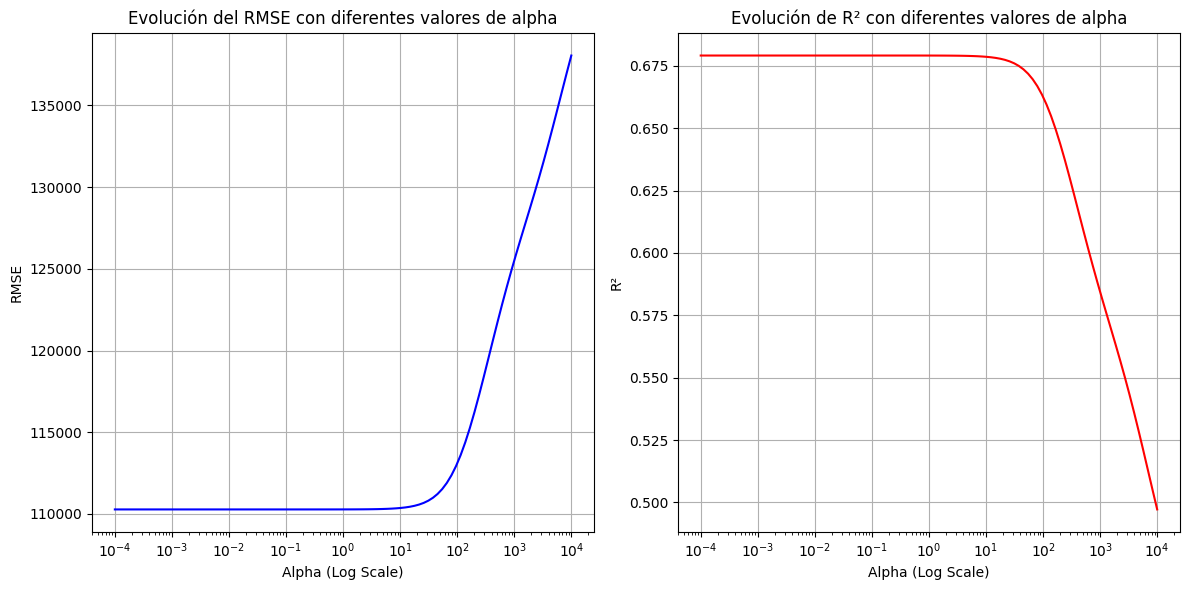

In [ ]:
# Usamos los datos de entrenamiento
X_train_scaled = X_train
y_train = y_train

# Valores de alpha para probar
alpha_values = np.logspace(-4, 4, 100)  # Probamos valores de alpha de 10^-4 a 10^4

# Listas para almacenar los resultados
rmse_train = []
r2_train = []

# Ajustamos el modelo Ridge para cada valor de alpha
for alpha in alpha_values:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train_scaled, y_train)

    # Predicciones
    y_train_pred = model_ridge.predict(X_train_scaled)

    # Métricas de rendimiento
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    r2_train.append(r2_score(y_train, y_train_pred))

# Graficamos los resultados
plt.figure(figsize=(12, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(alpha_values, rmse_train, label='RMSE', color='b')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('RMSE')
plt.title('Evolución del RMSE con diferentes valores de alpha')
plt.grid(True)

# R²
plt.subplot(1, 2, 2)
plt.plot(alpha_values, r2_train, label='R²', color='r')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('R²')
plt.title('Evolución de R² con diferentes valores de alpha')
plt.grid(True)

plt.tight_layout()
plt.show()

aca podemos observar cómo varían los errores de entrenamiento y prueba para distintos valores de alpha en el modelo Ridge. Alpha controla la regularización: cuanto mayor sea su valor, mayor será la penalización sobre los coeficientes del modelo.

Log-scale en el eje x: Se usa para ver cómo los valores de alpha afectan al modelo en una escala más comprensible.

Errores de RMSE: El rendimiento se mide mediante el RMSE, que nos indica cuán lejos están las predicciones del modelo de los valores reales.

El valor de alpha que produce el RMSE más bajo antes de que se produzca el aumento (en este caso, alrededor de alpha ≈ 10^1) es generalmente el punto óptimo de regularización.

El modelo parece estar bien ajustado para los valores de alpha más pequeños, pero a medida que la regularización se vuelve más fuerte, el modelo pierde su capacidad de ajustar adecuadamente los datos, y eso da como resultado un aumento en RMSE.

El mejor valor para alpha sería el que da el menor error de prueba (RMSE más bajo) en la región donde los errores son más estables, que generalmente será antes del punto de inflexión.

con respecto a la curva de prueba antes de 10^1, el modelo mantiene un buen equilibrio entre regularización y ajuste, explicando alrededor del 67.5% de la variabilidad en los datos (R² ≈ 0.675).

Después de 10^1, el modelo comienza a perder capacidad para ajustar las relaciones en los datos, lo que se refleja en la caída drástica de R². Esto es una señal clara de underfitting: la regularización ha sido excesiva, y el modelo se ha vuelto demasiado simple para capturar la complejidad de los datos.





In [ ]:
# Ajustar el modelo Ridge
ridge = Ridge(alpha=1.0)  # Asegúrate de que 'alpha' y otros hiperparámetros estén definidos
ridge.fit(X_train, y_train)  # Ajustar el modelo con los datos de entrenamiento

# Realizar las predicciones después de ajustar el modelo
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Ajustar el modelo Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Ajustar el modelo ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)
y_train_pred_elasticnet = elasticnet.predict(X_train)
y_test_pred_elasticnet = elasticnet.predict(X_test)

# Ajustar el modelo Árbol de Regresión
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred_tree = tree_reg.predict(X_train)
y_test_pred_tree = tree_reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.428e+13, tolerance: 4.267e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.114e+13, tolerance: 4.267e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suponiendo que tienes las predicciones de cada modelo
# Ridge, Lasso, ElasticNet, y Árbol de Regresión (aquí predicciones de ejemplo)

# Predicciones para los datos de entrenamiento y prueba
# Reemplaza estas variables por las predicciones reales de tus modelos
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

y_train_pred_elasticnet = elasticnet.predict(X_train)
y_test_pred_elasticnet = elasticnet.predict(X_test)

y_train_pred_tree = tree_reg.predict(X_train)
y_test_pred_tree = tree_reg.predict(X_test)

# Cálculo de las métricas
def get_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Métricas para cada modelo
metrics_ridge_train = get_metrics(y_train, y_train_pred_ridge)
metrics_ridge_test = get_metrics(y_test, y_test_pred_ridge)

metrics_lasso_train = get_metrics(y_train, y_train_pred_lasso)
metrics_lasso_test = get_metrics(y_test, y_test_pred_lasso)

metrics_elasticnet_train = get_metrics(y_train, y_train_pred_elasticnet)
metrics_elasticnet_test = get_metrics(y_test, y_test_pred_elasticnet)

metrics_tree_train = get_metrics(y_train, y_train_pred_tree)
metrics_tree_test = get_metrics(y_test, y_test_pred_tree)

# Mostrar las métricas de evaluación
models = ['Ridge', 'Lasso', 'ElasticNet', 'Árbol de Regresión']

# Crear el cuadro comparativo
import pandas as pd

comparison_df = pd.DataFrame({
    'Modelo': models,
    'MSE Train': [metrics_ridge_train[0], metrics_lasso_train[0], metrics_elasticnet_train[0], metrics_tree_train[0]],
    'MSE Test': [metrics_ridge_test[0], metrics_lasso_test[0], metrics_elasticnet_test[0], metrics_tree_test[0]],
    'MAE Train': [metrics_ridge_train[1], metrics_lasso_train[1], metrics_elasticnet_train[1], metrics_tree_train[1]],
    'MAE Test': [metrics_ridge_test[1], metrics_lasso_test[1], metrics_elasticnet_test[1], metrics_tree_test[1]],
    'R² Train': [metrics_ridge_train[2], metrics_lasso_train[2], metrics_elasticnet_train[2], metrics_tree_train[2]],
    'R² Test': [metrics_ridge_test[2], metrics_lasso_test[2], metrics_elasticnet_test[2], metrics_tree_test[2]]
})

comparison_df

,Modelo,MSE Train,MSE Test,MAE Train,MAE Test,R² Train,R² Test
0,Ridge,1.216153e+10,1.164462e+10,83086.238103,82140.814257,0.679156,0.686663
1,Lasso,1.216120e+10,1.164088e+10,83090.741985,82141.661057,0.679165,0.686763
2,ElasticNet,1.496568e+10,1.439380e+10,93668.369734,92818.657327,0.605178,0.612687
3,Árbol de Regresión,6.680723e+07,1.038274e+10,704.074449,70514.026786,0.998238,0.720618


Modelo de Árbol de Regresión:

Tiene un MSE Train muy bajo, lo que indica que el modelo se ajusta muy bien a los datos de entrenamiento.

Sin embargo, su MSE Test es significativamente mayor, lo que sugiere que el modelo está sobreajustado (overfitting), ya que no generaliza bien a los datos de prueba.

El R² Train es casi perfecto (0.998), lo que es una señal clara de sobreajuste.

El R² Test es 0.721, lo que indica un rendimiento bueno pero no tan excepcional en el conjunto de prueba.

Modelos Lineales (Ridge, Lasso, ElasticNet):

Los MSE para estos modelos son bastante similares entre entrenamiento y prueba, lo que sugiere que están generalizando mejor.

Los R² para estos modelos son bastante cercanos (alrededor de 0.68 en el conjunto de prueba), lo que muestra un rendimiento moderado.

ElasticNet tiene el peor rendimiento en términos de MSE y R² en comparación con Ridge y Lasso, aunque sus valores no son extremadamente bajos. Esto podría indicar que la combinación de regularización en ElasticNet no es la más adecuada para este conjunto de datos.

Sobreajuste (Overfitting):

El modelo de Árbol de Regresión muestra señales claras de sobreajuste. El rendimiento en el conjunto de entrenamiento es extremadamente bueno, pero el rendimiento en el conjunto de prueba disminuye significativamente. Esto indica que el modelo ha aprendido detalles muy específicos del conjunto de entrenamiento que no se generalizan bien.

Si se busca un modelo que generalice bien a los datos de prueba, Ridge y Lasso parecen ser las mejores opciones, con un rendimiento bastante equilibrado entre entrenamiento y prueba.

Si se busca un modelo más complejo, el Árbol de Regresión podría capturar relaciones no lineales, hay que tener cuidado con el sobreajuste.

ElasticNet no ha mostrado un rendimiento superior en este caso, aunque podría ser útil probar con otros valores de sus hiperparámetros (como alpha o l1_ratio).

En general, basándome en estos resultados, Ridge o Lasso serían las opciones más robustas y estables en este caso.